# WORKING DOC

### Import Libraries and Dependencies

In [37]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [38]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'NoneType'>
Kraken secren data type: <class 'NoneType'>


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [39]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

In [40]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()
crypto_details['BTC/USD']['symbol']

'BTC/USD'

### Fetch Historical Data for LINK/USDT
Note: Other options include ADA, BCH, DAI, DOT, EOS, ETH, LINK, LTC, USDC, BTC, DOGE and XRP

In [41]:
# Fetch daily candlestick bar data from `BTC/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1h")
historical_prices[2]

[1620457200000, 48.07389, 48.78166, 47.96545, 48.78166, 316.75122747]

In [42]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume
0,1620450000000,48.74472,48.77291,48.47816,48.77291,64.822753
1,1620453600000,48.49332,48.49332,48.16533,48.19621,35.570059
2,1620457200000,48.07389,48.78166,47.96545,48.78166,316.751227
3,1620460800000,48.68386,48.88446,48.33974,48.33974,150.931599
4,1620464400000,48.00000,48.00000,47.80000,47.91219,270.675771


'____________________________________'

'historical_prices_df shape: (720, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [43]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume,date
0,1620450000000,48.74472,48.77291,48.47816,48.77291,64.822753,2021-05-08 05:00:00
1,1620453600000,48.49332,48.49332,48.16533,48.19621,35.570059,2021-05-08 06:00:00
2,1620457200000,48.07389,48.78166,47.96545,48.78166,316.751227,2021-05-08 07:00:00
3,1620460800000,48.68386,48.88446,48.33974,48.33974,150.931599,2021-05-08 08:00:00
4,1620464400000,48.00000,48.00000,47.80000,47.91219,270.675771,2021-05-08 09:00:00


'_________________________'

'historical_prices_df shape: (720, 7)'

In [44]:
# historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df.set_index(pd.to_datetime(
    historical_prices_df['date'], 
    infer_datetime_format=True), 
    inplace=True
)
historical_prices_df

,timestamp,open,high,low,close,volume,date
date,,,,,,,
2021-05-08 05:00:00,1620450000000,48.74472,48.77291,48.47816,48.77291,64.822753,2021-05-08 05:00:00
2021-05-08 06:00:00,1620453600000,48.49332,48.49332,48.16533,48.19621,35.570059,2021-05-08 06:00:00
2021-05-08 07:00:00,1620457200000,48.07389,48.78166,47.96545,48.78166,316.751227,2021-05-08 07:00:00
2021-05-08 08:00:00,1620460800000,48.68386,48.88446,48.33974,48.33974,150.931599,2021-05-08 08:00:00
2021-05-08 09:00:00,1620464400000,48.00000,48.00000,47.80000,47.91219,270.675771,2021-05-08 09:00:00
...,...,...,...,...,...,...,...
2021-06-07 00:00:00,1623024000000,27.50490,27.90262,27.32705,27.90262,1014.868872,2021-06-07 00:00:00
2021-06-07 01:00:00,1623027600000,27.89938,28.22285,27.86541,28.00447,819.310657,2021-06-07 01:00:00
2021-06-07 02:00:00,1623031200000,28.09038,28.29516,28.04000,28.24795,1297.819583,2021-06-07 02:00:00


### Plot Daily Returns

In [45]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].pct_change()
historical_prices_df = historical_prices_df.dropna() 
historical_prices_df

,timestamp,open,high,low,close,volume,date,daily_return
date,,,,,,,,
2021-05-08 06:00:00,1620453600000,48.49332,48.49332,48.16533,48.19621,35.570059,2021-05-08 06:00:00,-0.011824
2021-05-08 07:00:00,1620457200000,48.07389,48.78166,47.96545,48.78166,316.751227,2021-05-08 07:00:00,0.012147
2021-05-08 08:00:00,1620460800000,48.68386,48.88446,48.33974,48.33974,150.931599,2021-05-08 08:00:00,-0.009059
2021-05-08 09:00:00,1620464400000,48.00000,48.00000,47.80000,47.91219,270.675771,2021-05-08 09:00:00,-0.008845
2021-05-08 10:00:00,1620468000000,48.18938,48.18938,47.97931,48.08427,13.074686,2021-05-08 10:00:00,0.003592
...,...,...,...,...,...,...,...,...
2021-06-07 00:00:00,1623024000000,27.50490,27.90262,27.32705,27.90262,1014.868872,2021-06-07 00:00:00,0.020807
2021-06-07 01:00:00,1623027600000,27.89938,28.22285,27.86541,28.00447,819.310657,2021-06-07 01:00:00,0.003650
2021-06-07 02:00:00,1623031200000,28.09038,28.29516,28.04000,28.24795,1297.819583,2021-06-07 02:00:00,0.008694


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
#### 9, 20, 50, 200

In [46]:
# Set short and long windows


# Construct EMAS for short and long windows, respectively 9, 20, 50 and 200
historical_prices_df['EMA_9'] = historical_prices_df['close'].ewm(halflife=9).mean()
historical_prices_df['EMA_20'] = historical_prices_df['close'].ewm(halflife=20).mean()
historical_prices_df['EMA_50'] = historical_prices_df['close'].ewm(halflife=50).mean()
historical_prices_df['EMA_200'] = historical_prices_df['close'].ewm(halflife=200).mean()

# Construct a 9 VS 20 crossover trading signal
historical_prices_df['crossover_long_9v20'] = np.where(historical_prices_df['EMA_9'] > historical_prices_df['EMA_20'], 1.0, 0.0)
historical_prices_df['crossover_short_9v20'] = np.where(historical_prices_df['EMA_9'] < historical_prices_df['EMA_20'], -1.0, 0.0)
historical_prices_df['crossover_signal_9v20'] = historical_prices_df['crossover_long_9v20'] + historical_prices_df['crossover_short_9v20']


# Construct a 50 VS 200 crossover trading signal
historical_prices_df['crossover_long_50v200'] = np.where(historical_prices_df['EMA_50'] > historical_prices_df['EMA_200'], 1.0, 0.0)
historical_prices_df['crossover_short_50v200'] = np.where(historical_prices_df['EMA_50'] < historical_prices_df['EMA_200'], -1.0, 0.0)
historical_prices_df['crossover_signal_50v200'] = historical_prices_df['crossover_long_50v200'] + historical_prices_df['crossover_short_50v200']


historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,EMA_50,EMA_200,crossover_long_9v20,crossover_short_9v20,crossover_signal_9v20,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200
date,,,,,,,,,,,,,,,,,,
2021-05-08 06:00:00,1620453600000,48.49332,48.49332,48.16533,48.19621,35.570059,2021-05-08 06:00:00,-0.011824,48.196210,48.196210,48.196210,48.196210,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 07:00:00,1620457200000,48.07389,48.78166,47.96545,48.78166,316.751227,2021-05-08 07:00:00,0.012147,48.500202,48.494007,48.490964,48.489442,1.0,0.0,1.0,1.0,0.0,1.0
2021-05-08 08:00:00,1620460800000,48.68386,48.88446,48.33974,48.33974,150.931599,2021-05-08 08:00:00,-0.009059,48.442546,48.440793,48.439856,48.439368,1.0,0.0,1.0,1.0,0.0,1.0
2021-05-08 09:00:00,1620464400000,48.00000,48.00000,47.80000,47.91219,270.675771,2021-05-08 09:00:00,-0.008845,48.294270,48.301695,48.305184,48.306888,0.0,-1.0,-1.0,0.0,-1.0,-1.0
2021-05-08 10:00:00,1620468000000,48.18938,48.18938,47.97931,48.08427,13.074686,2021-05-08 10:00:00,0.003592,48.245565,48.255145,48.259767,48.262055,0.0,-1.0,-1.0,0.0,-1.0,-1.0


In [47]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200


### Plot Exponential Moving Average of Closing Prices 9 VS 20

<AxesSubplot:xlabel='date'>

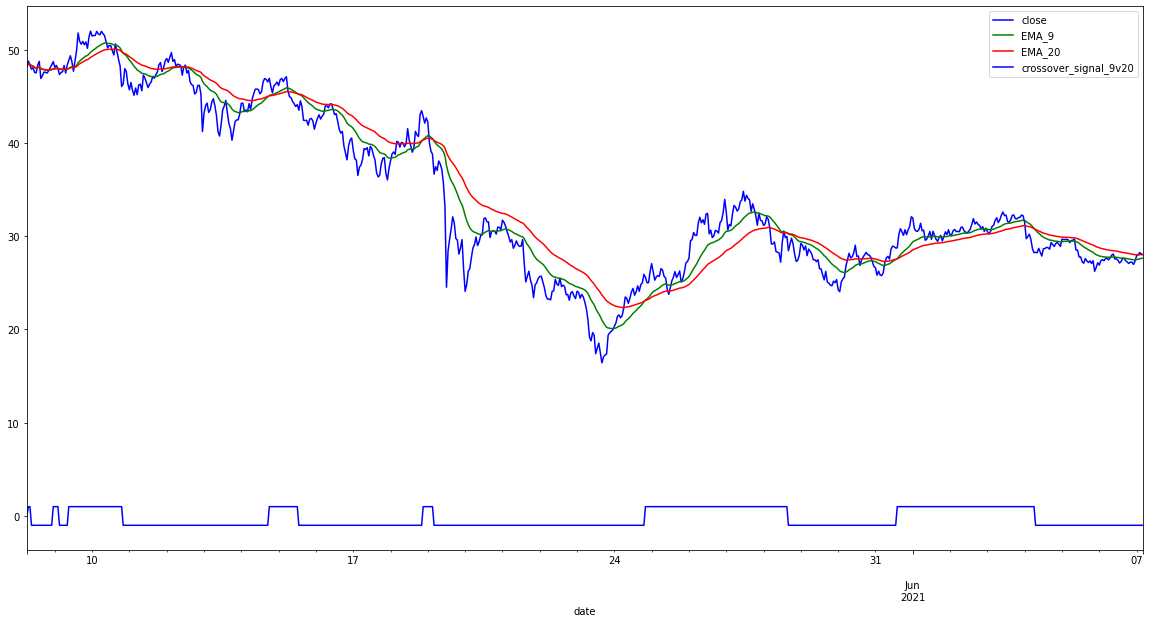

In [48]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'crossover_signal_9v20']].plot(figsize=(20,10), color=['b', 'g', 'r', 'b'])

In [49]:
### Plot Exponential Moving Average of Closing Prices 50 VS 200

<AxesSubplot:xlabel='date'>

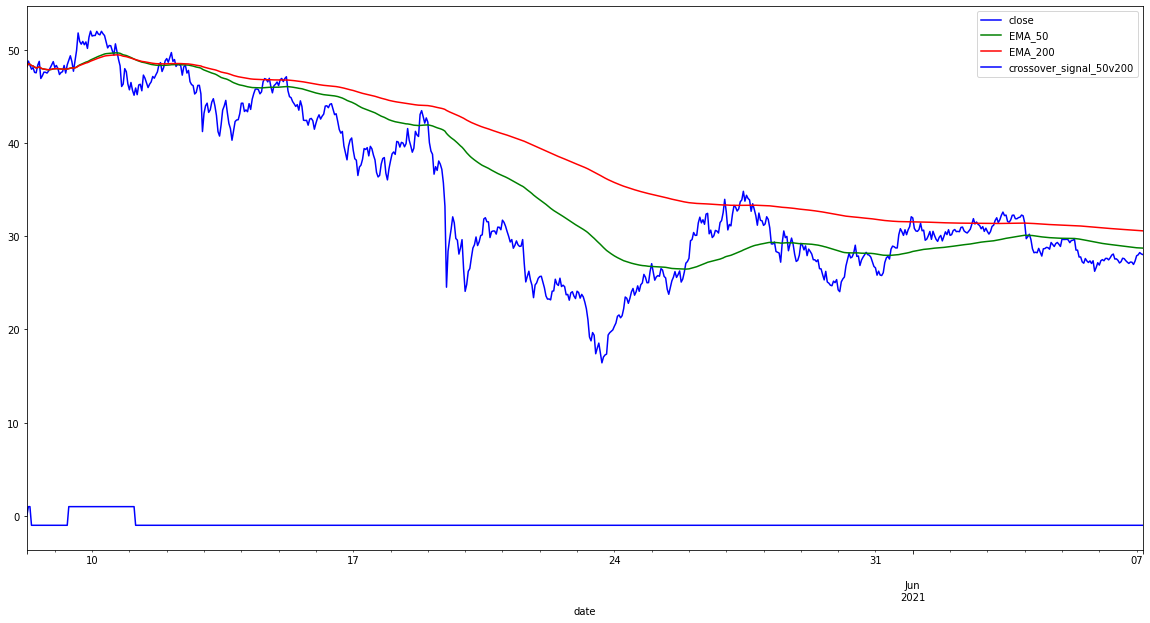

In [50]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_50', 'EMA_200', 'crossover_signal_50v200']].plot(figsize=(20,10), color=['b', 'g', 'r', 'b'])

<AxesSubplot:xlabel='date'>

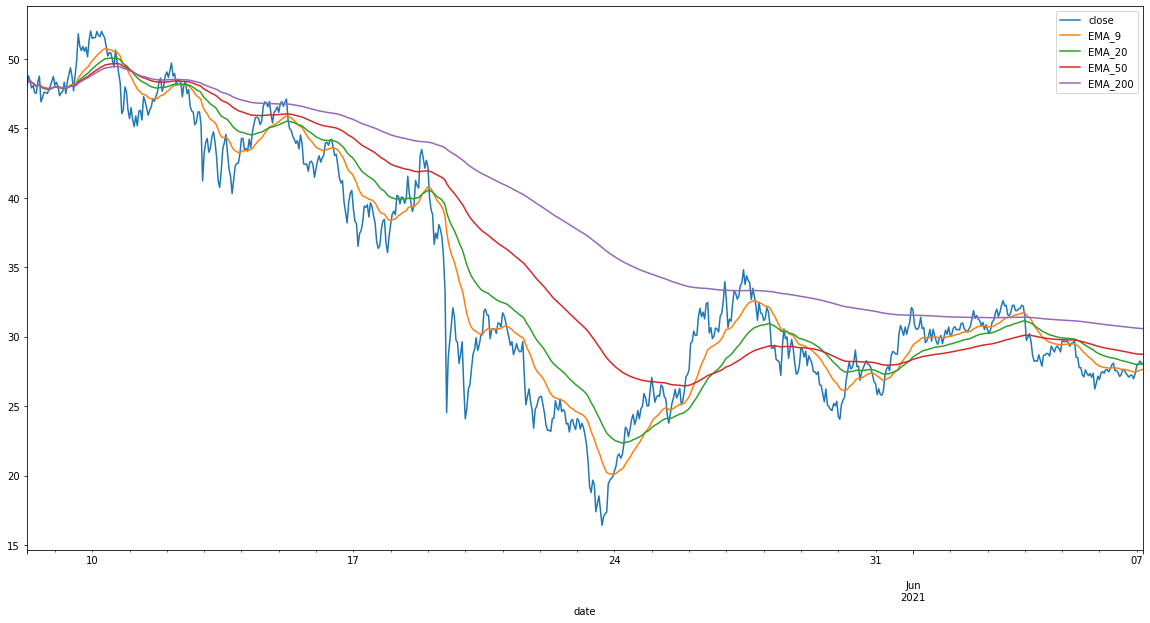

In [51]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [52]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.iloc[50:60]

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-10 08:00:00,1620633600000,51.53805,51.71618,50.80629,51.52213,2648.774972,2021-05-10 08:00:00,-0.003826,50.723401,49.986840,...,1.0,0.0,1.0,51.140360,0.821051,51.961411,50.319308,0.0,0.0,0.0
2021-05-10 09:00:00,1620637200000,51.41018,51.82003,50.58389,50.85370,772.559592,2021-05-10 09:00:00,-0.012974,50.733239,50.022201,...,1.0,0.0,1.0,51.242509,0.617918,51.860427,50.624590,0.0,0.0,0.0
2021-05-10 10:00:00,1620640800000,50.91595,51.11064,50.13834,50.19934,482.013481,2021-05-10 10:00:00,-0.012868,50.692984,50.029379,...,1.0,0.0,1.0,51.256793,0.588168,51.844961,50.668625,1.0,0.0,1.0
2021-05-10 11:00:00,1620644400000,50.05272,50.97968,49.30000,50.45710,1336.391559,2021-05-10 11:00:00,0.005135,50.675222,50.046598,...,1.0,0.0,1.0,51.189572,0.599355,51.788927,50.590217,1.0,0.0,1.0
2021-05-10 12:00:00,1620648000000,50.43851,50.75521,50.15697,50.42942,1082.353878,2021-05-10 12:00:00,-0.000549,50.656734,50.061916,...,1.0,0.0,1.0,51.166108,0.620166,51.786275,50.545942,1.0,0.0,1.0
2021-05-10 13:00:00,1620651600000,50.20784,50.71584,49.69643,49.89203,759.248805,2021-05-10 13:00:00,-0.010656,50.599281,50.055158,...,1.0,0.0,1.0,51.130792,0.672133,51.802926,50.458659,1.0,0.0,1.0
2021-05-10 14:00:00,1620655200000,49.80106,49.80106,49.15912,49.44167,291.435654,2021-05-10 14:00:00,-0.009027,50.512395,50.030896,...,1.0,0.0,1.0,51.058381,0.770295,51.828676,50.288086,1.0,0.0,1.0
2021-05-10 15:00:00,1620658800000,49.10291,50.63303,49.10287,50.63303,1614.345874,2021-05-10 15:00:00,0.024096,50.521441,50.054579,...,1.0,0.0,1.0,51.062884,0.767381,51.830265,50.295503,0.0,0.0,0.0
2021-05-10 16:00:00,1620662400000,50.54243,50.86507,49.78809,49.79332,3512.296482,2021-05-10 16:00:00,-0.016584,50.466889,50.044357,...,1.0,0.0,1.0,51.010550,0.817440,51.827990,50.193110,1.0,0.0,1.0


### Plot Bollinger Bands

<AxesSubplot:xlabel='date'>

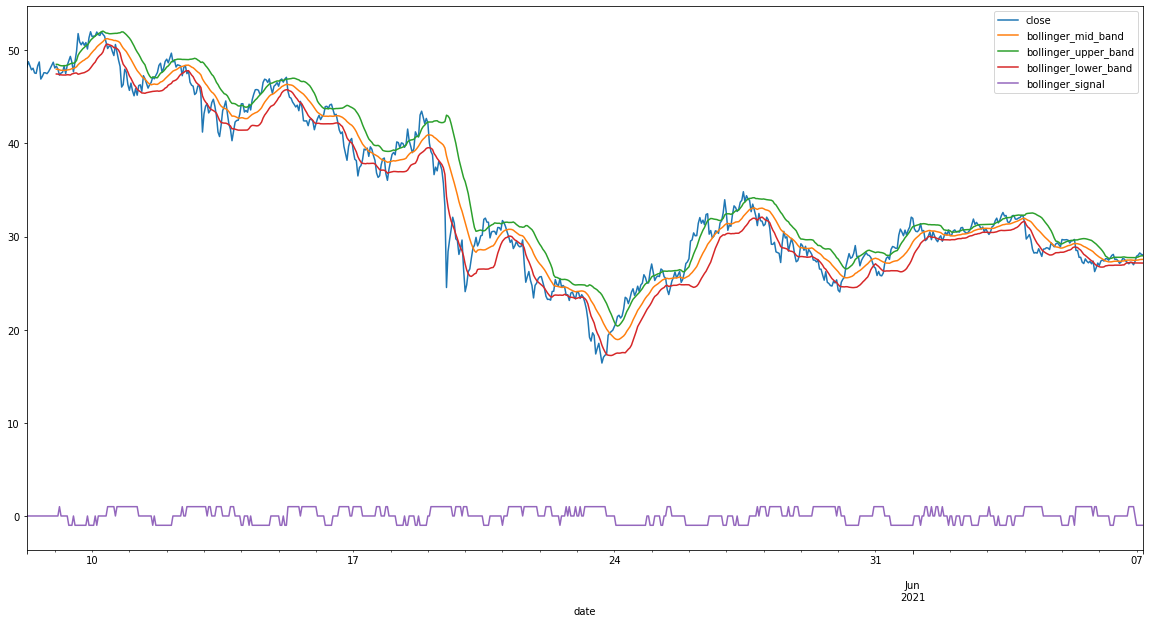

In [53]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band', 'bollinger_signal']].plot(figsize=(20,10))

### Build MACD Signals

In [54]:

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_12'] = historical_prices_df['close'].ewm(span=12, adjust=False).mean()
historical_prices_df['mac_slow_26'] = historical_prices_df['close'].ewm(span=26, adjust=False).mean()

# Build the Macd line and the Signal Line
macd = historical_prices_df['mac_fast_12'] - historical_prices_df['mac_slow_26']
historical_prices_df['macd'] = macd
historical_prices_df['mac_signal_line_9ema'] = macd.ewm(span=9, adjust=False).mean()

# Calculate difference between macd and signal
macd_diff = historical_prices_df['macd'] - historical_prices_df['mac_signal_line_9ema']
historical_prices_df['macd_diff'] = macd_diff


# Construct a macd trading signal
historical_prices_df['macd_long'] = np.where(historical_prices_df['macd_diff'] > 0, 1.0, 0.0)
historical_prices_df['macd_short'] = np.where(historical_prices_df['macd_diff'] < 0, -1.0, 0.0)
historical_prices_df['macd_signal'] = historical_prices_df['macd_long'] + historical_prices_df['macd_short']

# Construct a conservative trading signal
historical_prices_df['macd_diff_shift'] = historical_prices_df['macd_diff'].shift(1)
historical_prices_df['macd_diff_gradient'] = ( (historical_prices_df['macd_diff'] - historical_prices_df['macd_diff_shift']) / (historical_prices_df['macd_diff_shift']) )

historical_prices_df['macd_conservative_long_exit'] = np.where(historical_prices_df['macd_diff_gradient'] < 0, -1.0, 0.0)
historical_prices_df['macd_conservative_short_exit'] = np.where(historical_prices_df['macd_diff_gradient'] > 0, 1.0, 0.0)


mac_list = ['close', 'mac_fast_12', 'mac_slow_26', 'macd', 'mac_signal_line_9ema', 'macd_diff', 'macd_long', 'macd_short', 'macd_signal', 'macd_diff_shift', 'macd_diff_gradient', 'macd_conservative_long_exit', 'macd_conservative_short_exit']
historical_prices_df[mac_list].iloc[50:100]

,close,mac_fast_12,mac_slow_26,macd,mac_signal_line_9ema,macd_diff,macd_long,macd_short,macd_signal,macd_diff_shift,macd_diff_gradient,macd_conservative_long_exit,macd_conservative_short_exit
date,,,,,,,,,,,,,
2021-05-10 08:00:00,51.52213,51.423233,50.672761,0.750471,0.796938,-0.046467,0.0,-1.0,-1.0,-0.008116,4.725662,0.0,1.0
2021-05-10 09:00:00,50.85370,51.335612,50.686164,0.649448,0.767440,-0.117992,0.0,-1.0,-1.0,-0.046467,1.539269,0.0,1.0
2021-05-10 10:00:00,50.19934,51.160801,50.650103,0.510698,0.716092,-0.205394,0.0,-1.0,-1.0,-0.117992,0.740740,0.0,1.0
2021-05-10 11:00:00,50.45710,51.052540,50.635807,0.416733,0.656220,-0.239487,0.0,-1.0,-1.0,-0.205394,0.165990,0.0,1.0
2021-05-10 12:00:00,50.42942,50.956675,50.620519,0.336156,0.592207,-0.256051,0.0,-1.0,-1.0,-0.239487,0.069164,0.0,1.0
2021-05-10 13:00:00,49.89203,50.792883,50.566557,0.226327,0.519031,-0.292704,0.0,-1.0,-1.0,-0.256051,0.143148,0.0,1.0
2021-05-10 14:00:00,49.44167,50.585004,50.483232,0.101773,0.435580,-0.333807,0.0,-1.0,-1.0,-0.292704,0.140423,0.0,1.0
2021-05-10 15:00:00,50.63303,50.592393,50.494328,0.098065,0.368077,-0.270012,0.0,-1.0,-1.0,-0.333807,-0.191114,-1.0,0.0
2021-05-10 16:00:00,49.79332,50.469459,50.442401,0.027057,0.299873,-0.272815,0.0,-1.0,-1.0,-0.270012,0.010385,0.0,1.0


<AxesSubplot:xlabel='date'>

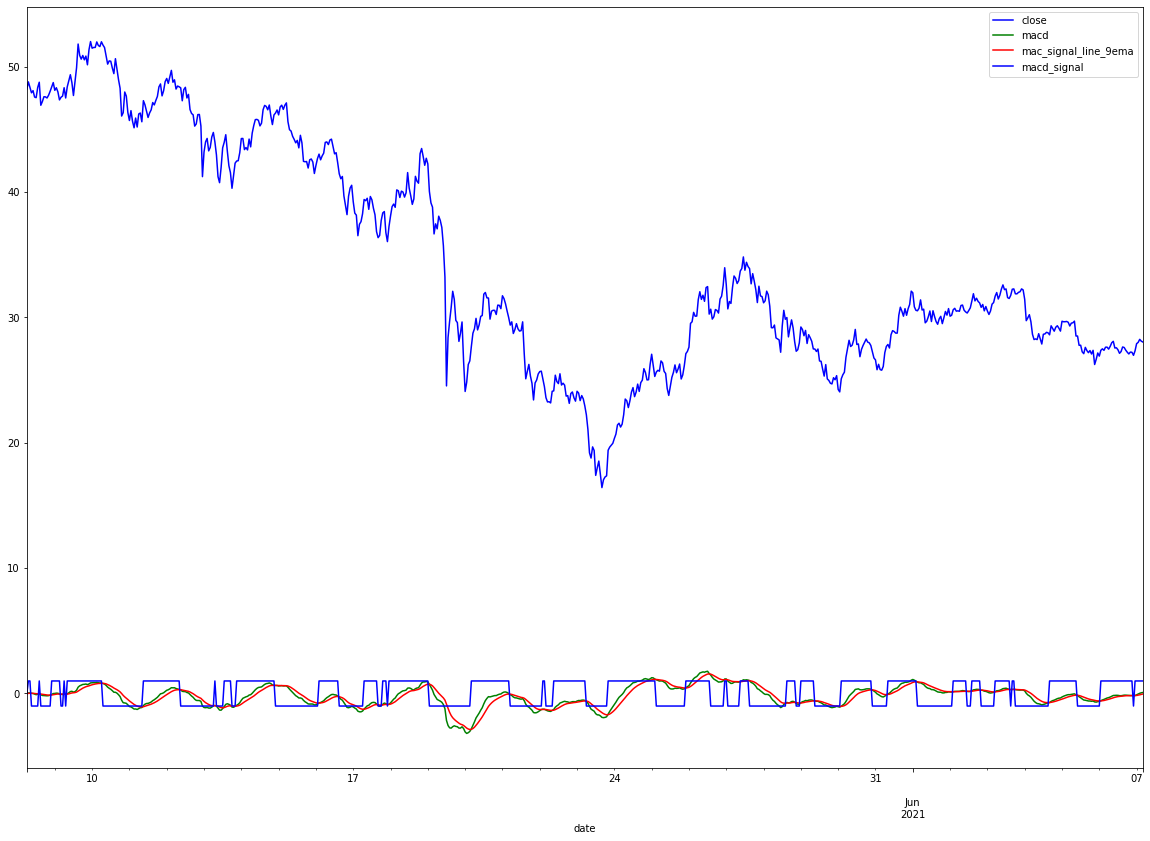

In [55]:
historical_prices_df[['close', 'macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(20,14), color=['b', 'g', 'r', 'b'])

In [56]:
### SAVE FOR LATER ####
## A conservative, yet effective way to use the macd is to exit your position the second the MACD-SIGNAL value starts to decrease.
##### i.e. if you're in a long position, and the mac

# historical_prices_df['macd_less_signal_diff'] = historical_prices_df['macd_less_signal']diff()
# historical_prices_df.head()

In [57]:
# historical_prices_df[['close','macd','macd_signal']].plot(figsize=(20,10))

# historical_prices_df[['macd_less_signal', 'macd_less_signal_slope', 'mac_signal']].plot(figsize=(20,10))
# plt.axhline(y=0, color='r', linestyle='-')


# SO, A CONSERVATIVE MACD SIGNAL WOULD SAY, CLOSE POSITION WHEN THE ORANGE LINE CROSSES BACK ABOVE THE ZERO LINE. 
# YOU EXIT YOUR POSITIONS EARLY AND OFTEN MISS BIG GAINS, HOWEVER, YOUR LIKELINESS TO TAKE HOME PROFIT IS HIGHER.

### Build RSI Signals

In [58]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

historical_prices_df['change'] = historical_prices_df['close'].diff()
historical_prices_df['gain'] = historical_prices_df.change.mask(historical_prices_df.change < 0, 0.0)
historical_prices_df['loss'] = -historical_prices_df.change.mask(historical_prices_df.change > 0, -0.0)
historical_prices_df['avg_gain'] = rma(historical_prices_df.gain[n+1:].to_numpy(), n, np.nansum(historical_prices_df.gain.to_numpy()[:n+1])/n)
historical_prices_df['avg_loss'] = rma(historical_prices_df.loss[n+1:].to_numpy(), n, np.nansum(historical_prices_df.loss.to_numpy()[:n+1])/n)
historical_prices_df['rs'] = historical_prices_df.avg_gain / historical_prices_df.avg_loss
historical_prices_df['rsi_14'] = 100 - (100 / (1 + historical_prices_df.rs))

historical_prices_df.head()


,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,macd_diff_gradient,macd_conservative_long_exit,macd_conservative_short_exit,change,gain,loss,avg_gain,avg_loss,rs,rsi_14
date,,,,,,,,,,,,,,,,,,,,,
2021-05-08 06:00:00,1620453600000,48.49332,48.49332,48.16533,48.19621,35.570059,2021-05-08 06:00:00,-0.011824,48.196210,48.196210,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-08 07:00:00,1620457200000,48.07389,48.78166,47.96545,48.78166,316.751227,2021-05-08 07:00:00,0.012147,48.500202,48.494007,...,inf,0.0,1.0,0.58545,0.58545,0.00000,NaN,NaN,NaN,NaN
2021-05-08 08:00:00,1620460800000,48.68386,48.88446,48.33974,48.33974,150.931599,2021-05-08 08:00:00,-0.009059,48.442546,48.440793,...,-0.182758,-1.0,0.0,-0.44192,0.00000,0.44192,NaN,NaN,NaN,NaN
2021-05-08 09:00:00,1620464400000,48.00000,48.00000,47.80000,47.91219,270.675771,2021-05-08 09:00:00,-0.008845,48.294270,48.301695,...,-1.091263,-1.0,0.0,-0.42755,0.00000,0.42755,NaN,NaN,NaN,NaN
2021-05-08 10:00:00,1620468000000,48.18938,48.18938,47.97931,48.08427,13.074686,2021-05-08 10:00:00,0.003592,48.245565,48.255145,...,3.554570,0.0,1.0,0.17208,0.17208,0.00000,NaN,NaN,NaN,NaN


In [59]:
# Construct a rsi trading signal
historical_prices_df['rsi_oversold'] = np.where(historical_prices_df['rsi_14'] < 30, 1.0, 0.0)
historical_prices_df['rsi_overbought'] = np.where(historical_prices_df['rsi_14'] > 70, 1.0, 0.0)


# Set x variable list of features
rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold'] # NEED TO ADD 'rsi_signal',

historical_prices_df[rsi_list].iloc[70:80]
# historical_prices_df.head()

,close,daily_return,rs,rsi_14,rsi_overbought,rsi_oversold
date,,,,,,
2021-05-11 04:00:00,45.89703,0.017202,0.620630,38.295598,0.0,0.0
2021-05-11 05:00:00,45.18302,-0.015557,0.552902,35.604445,0.0,0.0
2021-05-11 06:00:00,46.22390,0.023037,0.724225,42.002923,0.0,0.0
2021-05-11 07:00:00,46.29884,0.001621,0.737508,42.446318,0.0,0.0
2021-05-11 08:00:00,45.60073,-0.015078,0.650783,39.422702,0.0,0.0
2021-05-11 09:00:00,47.28453,0.036925,0.956225,48.881135,0.0,0.0
2021-05-11 10:00:00,46.95452,-0.006979,0.898312,47.321618,0.0,0.0
2021-05-11 11:00:00,46.45000,-0.010745,0.816860,44.959992,0.0,0.0
2021-05-11 12:00:00,45.94570,-0.010857,0.744221,42.667820,0.0,0.0


In [60]:
# Create a lagging window in which you get a buy/sell signal

rolling_periods = 15

rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold', 'rsi_overbought_preceeding_5', 'rsi_oversold_preceeding_5'] # NEED TO ADD 'rsi_signal',
historical_prices_df['rsi_oversold_preceeding_5'] = historical_prices_df['rsi_oversold'].rolling(rolling_periods, min_periods=1).sum()
historical_prices_df['rsi_overbought_preceeding_5'] = historical_prices_df['rsi_overbought'].rolling(rolling_periods, min_periods=1).sum()

historical_prices_df['rsi_short'] = np.where(historical_prices_df['rsi_overbought_preceeding_5'] > 0, -1.0, 0.0)
historical_prices_df['rsi_long'] = np.where(historical_prices_df['rsi_oversold_preceeding_5'] > 0, 1.0, 0.0)

historical_prices_df['rsi_signal'] = historical_prices_df['rsi_long'] + historical_prices_df['rsi_short']


rsi_list = ['rs',	'rsi_14',	'rsi_overbought',	'rsi_oversold',	'rsi_overbought_preceeding_5',	'rsi_oversold_preceeding_5',	'rsi_long',	'rsi_short',	'rsi_signal']
display(historical_prices_df[rsi_list].iloc[73:89])
display(historical_prices_df[rsi_list].iloc[200:220])

,rs,rsi_14,rsi_overbought,rsi_oversold,rsi_overbought_preceeding_5,rsi_oversold_preceeding_5,rsi_long,rsi_short,rsi_signal
date,,,,,,,,,
2021-05-11 07:00:00,0.737508,42.446318,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2021-05-11 08:00:00,0.650783,39.422702,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2021-05-11 09:00:00,0.956225,48.881135,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2021-05-11 10:00:00,0.898312,47.321618,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-11 11:00:00,0.816860,44.959992,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-11 12:00:00,0.744221,42.667820,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-11 13:00:00,0.813074,44.845054,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-11 14:00:00,0.863384,46.334201,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-11 15:00:00,0.991079,49.775976,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,rs,rsi_14,rsi_overbought,rsi_oversold,rsi_overbought_preceeding_5,rsi_oversold_preceeding_5,rsi_long,rsi_short,rsi_signal
date,,,,,,,,,
2021-05-16 14:00:00,0.669500,40.101822,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-16 15:00:00,0.531792,34.717002,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-16 16:00:00,0.484085,32.618396,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-16 17:00:00,0.528009,34.555373,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-16 18:00:00,0.374231,27.232039,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2021-05-16 19:00:00,0.324315,24.489236,0.0,1.0,0.0,2.0,1.0,0.0,1.0
2021-05-16 20:00:00,0.284724,22.162270,0.0,1.0,0.0,3.0,1.0,0.0,1.0
2021-05-16 21:00:00,0.548511,35.421842,0.0,0.0,0.0,3.0,1.0,0.0,1.0
2021-05-16 22:00:00,0.673161,40.232884,0.0,0.0,0.0,3.0,1.0,0.0,1.0


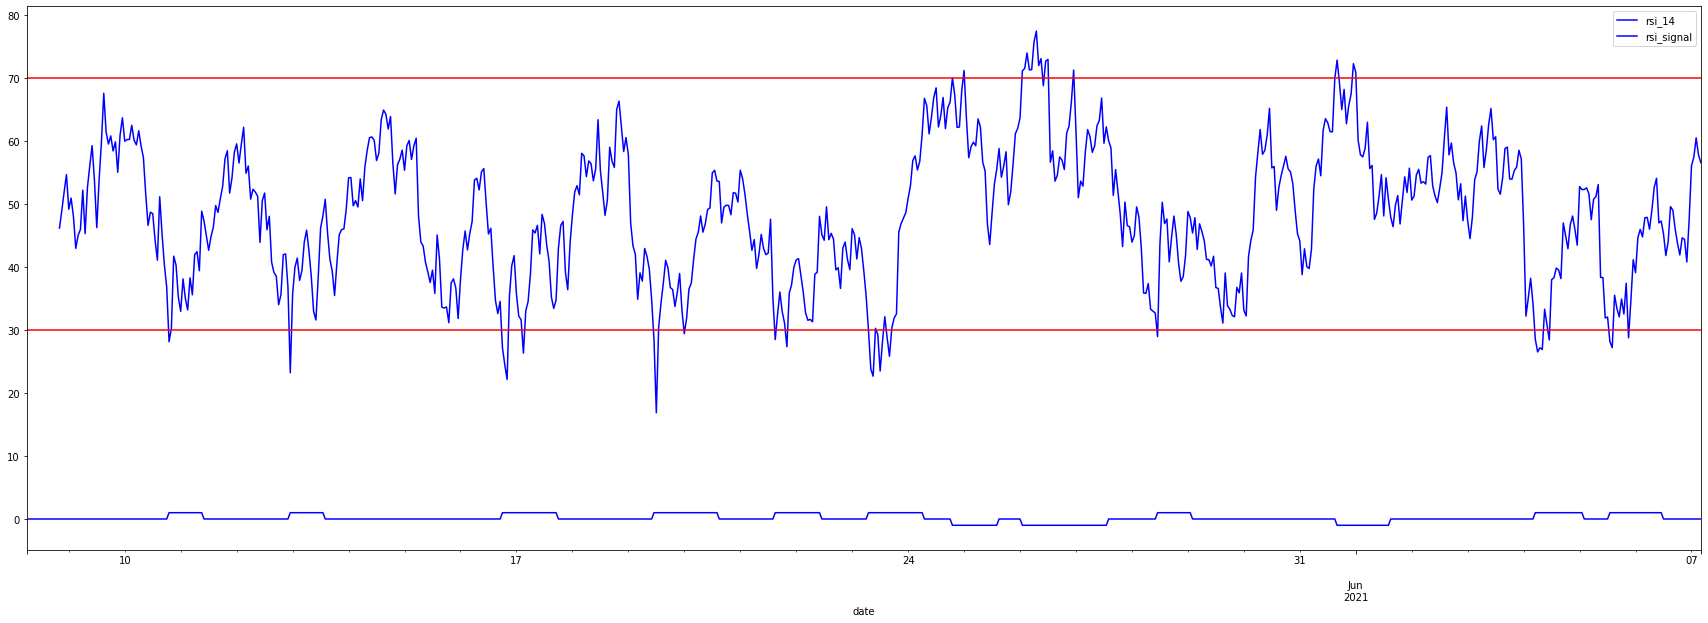

In [61]:
historical_prices_df[['rsi_14', 'rsi_signal']].plot(figsize=(30,10), color=['b', 'b'])
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='r', linestyle='-')

In [62]:
historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,avg_loss,rs,rsi_14,rsi_oversold,rsi_overbought,rsi_oversold_preceeding_5,rsi_overbought_preceeding_5,rsi_short,rsi_long,rsi_signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-08 06:00:00,1620453600000,48.49332,48.49332,48.16533,48.19621,35.570059,2021-05-08 06:00:00,-0.011824,48.196210,48.196210,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 07:00:00,1620457200000,48.07389,48.78166,47.96545,48.78166,316.751227,2021-05-08 07:00:00,0.012147,48.500202,48.494007,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 08:00:00,1620460800000,48.68386,48.88446,48.33974,48.33974,150.931599,2021-05-08 08:00:00,-0.009059,48.442546,48.440793,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 09:00:00,1620464400000,48.00000,48.00000,47.80000,47.91219,270.675771,2021-05-08 09:00:00,-0.008845,48.294270,48.301695,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 10:00:00,1620468000000,48.18938,48.18938,47.97931,48.08427,13.074686,2021-05-08 10:00:00,0.003592,48.245565,48.255145,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. MACHINE LEARNING COMPONENT

## Set X-Variable List FOR EACH STRATEGY Filter to Obtain Associated Values

In [63]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
macd_diff_shift
macd_diff_gradient
macd_conservative_long_exit
macd_conservative_short_exit
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_5
rsi_overbought_preceeding_5
rsi_short
rsi_long
rsi_signal


### Define Strategies. 
 >  Strategy 1 = EMA50v200 + BB <br />
 > Strategy 2 = br />
 > Strategy 3 = EMA50v200 + EMA10v20 + MACD

In [64]:
# Set x variable list of features
st1_x_var_list = ['close', 'crossover_signal_50v200', 'bollinger_signal'] #'rsi_signal',
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal'] #'rsi_signal',
st3_x_var_list = ['close', 'crossover_signal_50v200', 'macd_signal']

## Strategy 1 - EMA50V200 + Bollinger

In [65]:
historical_prices_df[st1_x_var_list].iloc[550:570]

,close,crossover_signal_50v200,bollinger_signal
date,,,
2021-05-31 04:00:00,25.78724,-1.0,1.0
2021-05-31 05:00:00,26.08743,-1.0,1.0
2021-05-31 06:00:00,27.18582,-1.0,0.0
2021-05-31 07:00:00,27.68282,-1.0,0.0
2021-05-31 08:00:00,27.84000,-1.0,0.0
2021-05-31 09:00:00,27.55617,-1.0,0.0
2021-05-31 10:00:00,28.61826,-1.0,-1.0
2021-05-31 11:00:00,28.94082,-1.0,-1.0
2021-05-31 12:00:00,28.87573,-1.0,-1.0


In [66]:
# Filter by x-variable list
strategy_1 = historical_prices_df[st1_x_var_list]



# shift the bollinger signal down, to help find the OPTIMAL Buy/sell time 
strategy_1['bollinger_shift'] = strategy_1['bollinger_signal'].shift(1)


# Define long and short position conditions
strategy_1['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_1.iloc[509:528]
strategy_1.tail(20)



,close,crossover_signal_50v200,bollinger_signal,bollinger_shift,bull_or_bear
date,,,,,
2021-06-06 09:00:00,28.09250,-1.0,-1.0,-1.0,Bear
2021-06-06 10:00:00,27.55617,-1.0,0.0,-1.0,Bear
2021-06-06 11:00:00,27.57687,-1.0,0.0,0.0,Bear
2021-06-06 12:00:00,27.41519,-1.0,0.0,0.0,Bear
2021-06-06 13:00:00,27.13228,-1.0,0.0,0.0,Bear
2021-06-06 14:00:00,27.27036,-1.0,0.0,0.0,Bear
2021-06-06 15:00:00,27.63934,-1.0,0.0,0.0,Bear
2021-06-06 16:00:00,27.59817,-1.0,0.0,0.0,Bear
2021-06-06 17:00:00,27.38770,-1.0,0.0,0.0,Bear


## Program the Conditional Logic for the Trading Strategy

In [67]:


st1_position = 'none'
st1_position_code = 0
st1_positions = []
i = 0

for index, row in strategy_1.iterrows():
    
    # IF BEAR + BOLL == -1, SELL
    if (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == -1):
        st1_position = "sell"
        st1_position_code = -1
        st1_positions.append(st1_position_code)
        # st1_positions.append(f"{index}: {st1_position}, {st1_position_code}")
    
    
    # ELIF BEAR + BOLL == 1, BUY / EXIT SHORT
    elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == 1):
        st1_position = "none"
        st1_position_code = 0
        st1_positions.append(st1_position_code)
        # st1_positions.append(f"{index}: {st1_position}, {st1_position_code}")
    
    
    # ELIF BULL + BOLL == 1 BUY
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == 1):
        st1_position = "buy"
        st1_position_code = 1
        st1_positions.append(st1_position_code)
        # st1_positions.append(f"{index}: {st1_position}, {st1_position_code}")    
    
    # ELIF BULL + BOLL == -1, SELL / EXIT LONG
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == -1):
        st1_position = "none"
        st1_position_code = 0
        st1_positions.append(st1_position_code)
        # st1_positions.append(f"{index}: {st1_position}, {st1_position_code}")    

    
    # ELSE : O / NA
    else:
        st1_position = st1_position
        st1_positions.append(st1_position_code)
        # st1_positions.append(f"{index}: {st1_position}, {st1_position_code}")

# Double check the dataframes have the same row lengths
display(len(st1_positions))
display(strategy_1.shape)
display(historical_prices_df.shape)

719

(719, 5)

(719, 51)

In [68]:
strategy_1['boll_ema50200_position'] = st1_positions
historical_prices_df['st1_boll_ema50200_position'] = st1_positions
# strategy_1[130:170]
strategy_1[695:830]

,close,crossover_signal_50v200,bollinger_signal,bollinger_shift,bull_or_bear,boll_ema50200_position
date,,,,,,
2021-06-06 05:00:00,27.62667,-1.0,0.0,0.0,Bear,0
2021-06-06 06:00:00,27.46645,-1.0,0.0,0.0,Bear,0
2021-06-06 07:00:00,27.68869,-1.0,-1.0,0.0,Bear,0
2021-06-06 08:00:00,27.97493,-1.0,-1.0,-1.0,Bear,0
2021-06-06 09:00:00,28.09250,-1.0,-1.0,-1.0,Bear,0
2021-06-06 10:00:00,27.55617,-1.0,0.0,-1.0,Bear,-1
2021-06-06 11:00:00,27.57687,-1.0,0.0,0.0,Bear,-1
2021-06-06 12:00:00,27.41519,-1.0,0.0,0.0,Bear,-1
2021-06-06 13:00:00,27.13228,-1.0,0.0,0.0,Bear,-1


In [69]:
strategy_1['boll_ema50200_position_shift'] = strategy_1['boll_ema50200_position'].shift(1)
strategy_1.head(5)

,close,crossover_signal_50v200,bollinger_signal,bollinger_shift,bull_or_bear,boll_ema50200_position,boll_ema50200_position_shift
date,,,,,,,
2021-05-08 06:00:00,48.19621,0.0,0.0,NaN,Bull,0,NaN
2021-05-08 07:00:00,48.78166,1.0,0.0,0.0,Bull,0,0.0
2021-05-08 08:00:00,48.33974,1.0,0.0,0.0,Bull,0,0.0
2021-05-08 09:00:00,47.91219,-1.0,0.0,0.0,Bear,0,0.0
2021-05-08 10:00:00,48.08427,-1.0,0.0,0.0,Bear,0,0.0


In [70]:
st1_signal_text = 'No Position - hold'
st1_signals = []

for index, row in strategy_1.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Close Short'
        st1_signals.append(st1_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Close Long'
        st1_signals.append(st1_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['boll_ema50200_position'] == 0) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'No Position - hold'
        st1_signals.append(st1_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'Sell Short'
        st1_signals.append(st1_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Hold Short Position'
        st1_signals.append(st1_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['boll_ema50200_position'] == -1) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = '‘Close Long Position, Enter short Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == 1):
        st1_signal_text = 'Hold Long Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == -1):
        st1_signal_text = 'Close Short Position, Enter Long Position'
        st1_signals.append(st1_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['boll_ema50200_position'] == 1) & (row['boll_ema50200_position_shift'] == 0):
        st1_signal_text = 'Enter Long Position'
        st1_signals.append(st1_signal_text)


    # Else, Signal = none
    else:
        st1_signal_text = st1_signal_text
        st1_signals.append(st1_signal_text)


strategy_1['boll_ema50200_signals'] = st1_signals
historical_prices_df['st1_boll_ema50200_signals'] = st1_signals
strategy_1[50:100]

,close,crossover_signal_50v200,bollinger_signal,bollinger_shift,bull_or_bear,boll_ema50200_position,boll_ema50200_position_shift,boll_ema50200_signals
date,,,,,,,,
2021-05-10 08:00:00,51.52213,1.0,0.0,0.0,Bull,0,0.0,No Position - hold
2021-05-10 09:00:00,50.85370,1.0,0.0,0.0,Bull,0,0.0,No Position - hold
2021-05-10 10:00:00,50.19934,1.0,1.0,0.0,Bull,0,0.0,No Position - hold
2021-05-10 11:00:00,50.45710,1.0,1.0,1.0,Bull,0,0.0,No Position - hold
2021-05-10 12:00:00,50.42942,1.0,1.0,1.0,Bull,0,0.0,No Position - hold
2021-05-10 13:00:00,49.89203,1.0,1.0,1.0,Bull,0,0.0,No Position - hold
2021-05-10 14:00:00,49.44167,1.0,1.0,1.0,Bull,0,0.0,No Position - hold
2021-05-10 15:00:00,50.63303,1.0,0.0,1.0,Bull,1,0.0,Enter Long Position
2021-05-10 16:00:00,49.79332,1.0,1.0,0.0,Bull,1,1.0,Hold Long Position


In [71]:
historical_prices_df.head(4)

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,rs,rsi_14,rsi_oversold,rsi_overbought,rsi_oversold_preceeding_5,rsi_overbought_preceeding_5,rsi_short,rsi_long,rsi_signal,boll_ema50200_position
date,,,,,,,,,,,,,,,,,,,,,
2021-05-08 06:00:00,1620453600000,48.49332,48.49332,48.16533,48.19621,35.570059,2021-05-08 06:00:00,-0.011824,48.196210,48.196210,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2021-05-08 07:00:00,1620457200000,48.07389,48.78166,47.96545,48.78166,316.751227,2021-05-08 07:00:00,0.012147,48.500202,48.494007,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2021-05-08 08:00:00,1620460800000,48.68386,48.88446,48.33974,48.33974,150.931599,2021-05-08 08:00:00,-0.009059,48.442546,48.440793,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2021-05-08 09:00:00,1620464400000,48.00000,48.00000,47.80000,47.91219,270.675771,2021-05-08 09:00:00,-0.008845,48.294270,48.301695,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Strategy 2 - RSI + MACD

In [72]:
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal', 'macd_conservative_long_exit', 'macd_conservative_short_exit']

historical_prices_df[st2_x_var_list].head(20)

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit
date,,,,,
2021-05-08 06:00:00,48.19621,0.0,0.0,0.0,0.0
2021-05-08 07:00:00,48.78166,0.0,1.0,0.0,1.0
2021-05-08 08:00:00,48.33974,0.0,1.0,-1.0,0.0
2021-05-08 09:00:00,47.91219,0.0,-1.0,-1.0,0.0
2021-05-08 10:00:00,48.08427,0.0,-1.0,0.0,1.0
2021-05-08 11:00:00,47.57216,0.0,-1.0,0.0,1.0
2021-05-08 12:00:00,47.52641,0.0,-1.0,0.0,1.0
2021-05-08 13:00:00,48.33875,0.0,-1.0,-1.0,0.0
2021-05-08 14:00:00,48.75600,0.0,1.0,-1.0,0.0


In [73]:
# Filter by x-variable list
strategy_2 = historical_prices_df[st2_x_var_list]

# Define long and short position conditions

environment = 'none'
environments = []

for index, row in strategy_2.iterrows():

    # If RSI signal == 1, OVERSOLD. I.e. enter long position
    if (row['rsi_signal'] == 1):
        environment = "Oversold. LONG!"
        environments.append(environment)
    
    # If RSI signal == -1, OVERBOUGHT. I.e. enter short position
    elif (row['rsi_signal'] == -1):
        environment = "Overbought. SELL!"
        environments.append(environment)
    
    # Else, price is fair
    else:
        environment = "Fair price"
        environments.append(environment)

display(len(environments))
display(strategy_2.shape)
display(historical_prices_df.shape)


719

(719, 5)

(719, 52)

In [74]:
strategy_2['rsi_window'] = environments
# historical_prices_df['rsi_window'] = environments
# strategy_2[130:170]
strategy_2[50:100]

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window
date,,,,,,
2021-05-10 08:00:00,51.52213,0.0,-1.0,0.0,1.0,Fair price
2021-05-10 09:00:00,50.85370,0.0,-1.0,0.0,1.0,Fair price
2021-05-10 10:00:00,50.19934,0.0,-1.0,0.0,1.0,Fair price
2021-05-10 11:00:00,50.45710,0.0,-1.0,0.0,1.0,Fair price
2021-05-10 12:00:00,50.42942,0.0,-1.0,0.0,1.0,Fair price
2021-05-10 13:00:00,49.89203,0.0,-1.0,0.0,1.0,Fair price
2021-05-10 14:00:00,49.44167,0.0,-1.0,0.0,1.0,Fair price
2021-05-10 15:00:00,50.63303,0.0,-1.0,-1.0,0.0,Fair price
2021-05-10 16:00:00,49.79332,0.0,-1.0,0.0,1.0,Fair price


In [75]:
# CREATE A MACD SIGNAL SHIFT 
strategy_2['macd_signal_shift'] = strategy_2['macd_signal'].shift(1)
strategy_2.head()

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window,macd_signal_shift
date,,,,,,,
2021-05-08 06:00:00,48.19621,0.0,0.0,0.0,0.0,Fair price,NaN
2021-05-08 07:00:00,48.78166,0.0,1.0,0.0,1.0,Fair price,0.0
2021-05-08 08:00:00,48.33974,0.0,1.0,-1.0,0.0,Fair price,1.0
2021-05-08 09:00:00,47.91219,0.0,-1.0,-1.0,0.0,Fair price,1.0
2021-05-08 10:00:00,48.08427,0.0,-1.0,0.0,1.0,Fair price,-1.0


### Program the Conditional Logic for the Trading Strategy

### Aggresive Macd. i.e hold until the next macd cross

In [80]:
st2_position = np.nan
st2_position_code = 0
st2_positions = []

for index, row in strategy_2.iterrows():

    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL (1), BUY
    if (row['rsi_signal'] == 1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] == -1):
        st2_position_code = 1
        st2_positions.append(st2_position_code)

    
    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == 1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] == 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)
    
    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] == 1):
        st2_position_code = -1
        st2_positions.append(st2_position_code)
    
    
    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL (1), BUY
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] == 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)

    # # IF RSI == FAIR (0) AND MACD GOES FROM 1 to -1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] == 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)
    
    # # IF RSI == FAIR (0) AND MACD GOES FROM -1 to 1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] == -1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)

    # ELSE : 0 / NA
    else:
        st2_position = st2_position
        st2_positions.append(st2_position_code)


display(len(st2_positions))
display(strategy_2.shape)
display(historical_prices_df.shape)

719

(719, 10)

(719, 53)

In [81]:
strategy_2['rsi_macd_agg_position'] = st2_positions
historical_prices_df['st2_rsi_macd_agg_position'] = st2_positions
# strategy_2[130:170]
# strategy_2[400:450]
strategy_2.head()


,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window,macd_signal_shift,rsi_macd_agg_position,rsi_macd_agg_position_shift,rsi_macd_agg_signals
date,,,,,,,,,,
2021-05-08 06:00:00,48.19621,0.0,0.0,0.0,0.0,Fair price,NaN,0,NaN,No Position - hold
2021-05-08 07:00:00,48.78166,0.0,1.0,0.0,1.0,Fair price,0.0,0,0.0,No Position - hold
2021-05-08 08:00:00,48.33974,0.0,1.0,-1.0,0.0,Fair price,1.0,0,0.0,No Position - hold
2021-05-08 09:00:00,47.91219,0.0,-1.0,-1.0,0.0,Fair price,1.0,0,0.0,No Position - hold
2021-05-08 10:00:00,48.08427,0.0,-1.0,0.0,1.0,Fair price,-1.0,0,0.0,No Position - hold


In [82]:
strategy_2['rsi_macd_agg_position_shift'] = strategy_2['rsi_macd_agg_position'].shift(1)
strategy_2.head(5)

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window,macd_signal_shift,rsi_macd_agg_position,rsi_macd_agg_position_shift,rsi_macd_agg_signals
date,,,,,,,,,,
2021-05-08 06:00:00,48.19621,0.0,0.0,0.0,0.0,Fair price,NaN,0,NaN,No Position - hold
2021-05-08 07:00:00,48.78166,0.0,1.0,0.0,1.0,Fair price,0.0,0,0.0,No Position - hold
2021-05-08 08:00:00,48.33974,0.0,1.0,-1.0,0.0,Fair price,1.0,0,0.0,No Position - hold
2021-05-08 09:00:00,47.91219,0.0,-1.0,-1.0,0.0,Fair price,1.0,0,0.0,No Position - hold
2021-05-08 10:00:00,48.08427,0.0,-1.0,0.0,1.0,Fair price,-1.0,0,0.0,No Position - hold


In [83]:
st2_signal = 'NA'
st2_signal_text = 'No Position - hold'
st2_signals = []

for index, row in strategy_2.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Close Short'
        st2_signals.append(st2_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Close Long'
        st2_signals.append(st2_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['rsi_macd_agg_position'] == 0) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'No Position - hold'
        st2_signals.append(st2_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'Sell Short'
        st2_signals.append(st2_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Hold Short Position'
        st2_signals.append(st2_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['rsi_macd_agg_position'] == -1) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = '‘Close Long Position, Enter short Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == 1):
        st2_signal_text = 'Hold Long Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == -1):
        st2_signal_text = 'Close Short Position, Enter Long Position'
        st2_signals.append(st2_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['rsi_macd_agg_position'] == 1) & (row['rsi_macd_agg_position_shift'] == 0):
        st2_signal_text = 'Enter Long Position'
        st2_signals.append(st2_signal_text)


    # Else, Signal = none
    else:
        st2_signal_text = st2_signal_text
        st2_signals.append(st2_signal_text)


strategy_2['rsi_macd_agg_signals'] = st2_signals
historical_prices_df['st2_rsi_macd_agg_signals'] = st2_signals
strategy_2[50:100]

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window,macd_signal_shift,rsi_macd_agg_position,rsi_macd_agg_position_shift,rsi_macd_agg_signals
date,,,,,,,,,,
2021-05-10 08:00:00,51.52213,0.0,-1.0,0.0,1.0,Fair price,-1.0,0,0.0,No Position - hold
2021-05-10 09:00:00,50.85370,0.0,-1.0,0.0,1.0,Fair price,-1.0,0,0.0,No Position - hold
2021-05-10 10:00:00,50.19934,0.0,-1.0,0.0,1.0,Fair price,-1.0,0,0.0,No Position - hold
2021-05-10 11:00:00,50.45710,0.0,-1.0,0.0,1.0,Fair price,-1.0,0,0.0,No Position - hold
2021-05-10 12:00:00,50.42942,0.0,-1.0,0.0,1.0,Fair price,-1.0,0,0.0,No Position - hold
2021-05-10 13:00:00,49.89203,0.0,-1.0,0.0,1.0,Fair price,-1.0,0,0.0,No Position - hold
2021-05-10 14:00:00,49.44167,0.0,-1.0,0.0,1.0,Fair price,-1.0,0,0.0,No Position - hold
2021-05-10 15:00:00,50.63303,0.0,-1.0,-1.0,0.0,Fair price,-1.0,0,0.0,No Position - hold
2021-05-10 16:00:00,49.79332,0.0,-1.0,0.0,1.0,Fair price,-1.0,0,0.0,No Position - hold


## Strategy 3 - EMA50V200 + MACD

In [84]:
historical_prices_df[st3_x_var_list].iloc[550:570]
historical_prices_df.shape

(719, 55)

In [85]:
# Filter by x-variable list
strategy_3 = historical_prices_df[st3_x_var_list]

# Define long and short position conditions
strategy_3['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_3.iloc[509:528]

strategy_3.head(5)

,close,crossover_signal_50v200,macd_signal,bull_or_bear
date,,,,
2021-05-08 06:00:00,48.19621,0.0,0.0,Bull
2021-05-08 07:00:00,48.78166,1.0,1.0,Bull
2021-05-08 08:00:00,48.33974,1.0,1.0,Bull
2021-05-08 09:00:00,47.91219,-1.0,-1.0,Bear
2021-05-08 10:00:00,48.08427,-1.0,-1.0,Bear


In [86]:
strategy_3.shape

(719, 4)

## Program the Conditional Logic for the Trading Strategy

In [87]:
st3_position = 'none'
st3_position_code = 0
st3_positions = []
i = 0

for index, row in strategy_3.iterrows():
    
    # If EMA50v200 = -1 (BEAR) and MACD = 1, Position = 0 (No) Position
    if (row['crossover_signal_50v200'] == -1) & (row['macd_signal'] == 1):
        st3_position_code = 0
        st3_positions.append(st3_position_code)
        # print (f"{index} : {st3_position_code}")
        # position = "none"

    
    # If EMA50v200 = -1 (BEAR) and MACD = -1, Position = -1 (Short Position)
    elif (row['crossover_signal_50v200'] == -1) & (row['macd_signal'] == -1):
        st3_position_code = -1
        st3_positions.append(st3_position_code)
        # print (f"{index} : {st3_position_code}")
        # position = "short"


    
    # If EMA50v200 = 1 (BEAR) and MACD = -1, Position = 0 (No) Position
    elif (row['crossover_signal_50v200'] == 1) & (row['macd_signal'] == -1):
        st3_position_code = 0
        st3_positions.append(st3_position_code)
        # print (f"{index} : {st3_position_code}")
        # position = "none"

    
    # If EMA50v200 = 1 (BEAR) and MACD = 1, Position = 1 (Long Position)
    elif (row['crossover_signal_50v200'] == 1) & (row['macd_signal'] == 1):
        # position = "long"
        st3_position_code = 1
        st3_positions.append(st3_position_code)
        # print (f"{index} : {st3_position_code}")

    else:
        st3_position_code = st3_position_code
        st3_positions.append(st3_position_code)
        # positions.append(f"{index}: {position}, {position_code}")
        # print (f"{index} : {position_code}")        

# Double check the dataframes have the same row lengths
display(len(st3_positions))
display(strategy_3.shape)
display(historical_prices_df.shape)    

719

(719, 4)

(719, 55)

In [88]:
strategy_3['ema50200_macd_position'] = st3_positions
historical_prices_df['ema50200_macd_position'] = st3_positions
strategy_3.head()

,close,crossover_signal_50v200,macd_signal,bull_or_bear,ema50200_macd_position
date,,,,,
2021-05-08 06:00:00,48.19621,0.0,0.0,Bull,0
2021-05-08 07:00:00,48.78166,1.0,1.0,Bull,1
2021-05-08 08:00:00,48.33974,1.0,1.0,Bull,1
2021-05-08 09:00:00,47.91219,-1.0,-1.0,Bear,-1
2021-05-08 10:00:00,48.08427,-1.0,-1.0,Bear,-1


### CALCULATE SIGNALS

In [89]:
strategy_3['ema50200_macd_position_shift'] = strategy_3['ema50200_macd_position'].shift(1)
strategy_3

,close,crossover_signal_50v200,macd_signal,bull_or_bear,ema50200_macd_position,ema50200_macd_position_shift
date,,,,,,
2021-05-08 06:00:00,48.19621,0.0,0.0,Bull,0,NaN
2021-05-08 07:00:00,48.78166,1.0,1.0,Bull,1,0.0
2021-05-08 08:00:00,48.33974,1.0,1.0,Bull,1,1.0
2021-05-08 09:00:00,47.91219,-1.0,-1.0,Bear,-1,1.0
2021-05-08 10:00:00,48.08427,-1.0,-1.0,Bear,-1,-1.0
...,...,...,...,...,...,...
2021-06-07 00:00:00,27.90262,-1.0,1.0,Bear,0,0.0
2021-06-07 01:00:00,28.00447,-1.0,1.0,Bear,0,0.0
2021-06-07 02:00:00,28.24795,-1.0,1.0,Bear,0,0.0


In [91]:
st3_signal_text = 'No Position - hold'
st3_signals = []

for index, row in strategy_3.iterrows():

    # POsition = 0 : Former_Position = -1 : Signal = ‘Close Short’
    if (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Close Short'
        st3_signals.append(st3_signal_text)

    # POsition = 0:  Former_Position =1 : Signal = 'Close Long’
    elif (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Close Long'
        st3_signals.append(st3_signal_text)

    # POsition = 0 : Former_Position = 0 : Signal = Hold No Position
    elif (row['ema50200_macd_position'] == 0) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'No Position - hold'
        st3_signals.append(st3_signal_text)


    # POsition = -1  Former_Position =: 0 : Signal = ‘Sell Short’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'Sell Short'
        st3_signals.append(st3_signal_text)


    # POsition = -1  Former_Position =: -1 : Signal = ‘Hold Short Position’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Hold Short Position'
        st3_signals.append(st3_signal_text)


    # POsition = -1: Former_Position = 1 : Signal = ‘Close Long Position, Enter short Position’
    elif (row['ema50200_macd_position'] == -1) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = '‘Close Long Position, Enter short Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = 1 : Signal = ‘Hold Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == 1):
        st3_signal_text = 'Hold Long Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = -1 : Signal = ‘Close Short Position, Enter Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == -1):
        st3_signal_text = 'Close Short Position, Enter Long Position'
        st3_signals.append(st3_signal_text)


    # POsition = 1 : Former_Position = 0 : Signal = ‘Enter Long Position’
    elif (row['ema50200_macd_position'] == 1) & (row['ema50200_macd_position_shift'] == 0):
        st3_signal_text = 'Enter Long Position'
        st3_signals.append(st3_signal_text)


    # Else, Signal = none
    else:
        st3_signal_text = st3_signal_text
        st3_signals.append(st3_signal_text)


strategy_3['ema50200_macd_signal'] = st3_signals
strategy_3

,close,crossover_signal_50v200,macd_signal,bull_or_bear,ema50200_macd_position,ema50200_macd_position_shift,ema50200_macd_signal
date,,,,,,,
2021-05-08 06:00:00,48.19621,0.0,0.0,Bull,0,NaN,No Position - hold
2021-05-08 07:00:00,48.78166,1.0,1.0,Bull,1,0.0,Enter Long Position
2021-05-08 08:00:00,48.33974,1.0,1.0,Bull,1,1.0,Hold Long Position
2021-05-08 09:00:00,47.91219,-1.0,-1.0,Bear,-1,1.0,"‘Close Long Position, Enter short Position"
2021-05-08 10:00:00,48.08427,-1.0,-1.0,Bear,-1,-1.0,Hold Short Position
...,...,...,...,...,...,...,...
2021-06-07 00:00:00,27.90262,-1.0,1.0,Bear,0,0.0,No Position - hold
2021-06-07 01:00:00,28.00447,-1.0,1.0,Bear,0,0.0,No Position - hold
2021-06-07 02:00:00,28.24795,-1.0,1.0,Bear,0,0.0,No Position - hold


# FROM THIS POINT ONWARDS, ALEX HASN'T DONE ANYTHING

### Shift the DataFrame Index by 1

In [ ]:
historical_prices_df[x_var_list] = historical_prices_df[x_var_list].shift(1)
historical_prices_df[x_var_list].tail()

### Drop NAs and Replace Infs (Positive/Negative Infinity) 

In [ ]:
# Drop NAs and replace positive/negative infinity values
historical_prices_df.dropna(subset=x_var_list, inplace=True)
historical_prices_df.dropna(subset=['daily_return'], inplace=True)
historical_prices_df = historical_prices_df.replace([np.inf, -np.inf], np.nan)
historical_prices_df.head()

### Construct the Dependent Variable

In [ ]:
historical_prices_df['Positive Return'] = np.where(historical_prices_df['daily_return'] > 0, 1.0, 0.0)
historical_prices_df.head()

### Assign Training and Testing Windows